In [53]:
import pandas as pd
train = pd.read_csv("./classification220718/train.csv", index_col="no")
test = pd.read_csv("./classification220718/test.csv", index_col="no")
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [55]:
train['workdclass'] =train['workclass'].iloc[1].strip()

In [ ]:
train['workdclass']

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [3]:
train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [4]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### train과 test 데이터에 ? 있는 컬럼 : native-country, occupation, workclass
### - strip필요 (object Dtype)

In [5]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
train['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

In [7]:
train['workclass'] = train['workclass'].replace(' Private', 'Private')
train['workclass'] = train['workclass'].replace(' Self-emp-not-inc', 'Self-emp-not-inc')
train['workclass'] = train['workclass'].replace(' Local-gov', 'Local-gov')
train['workclass'] = train['workclass'].replace(' ?', 'Private')
train['workclass'] = train['workclass'].replace(' State-gov', 'State-gov')
train['workclass'] = train['workclass'].replace(' Self-emp-inc', 'Self-emp-inc')
train['workclass'] = train['workclass'].replace(' Federal-gov', 'Federal-gov')
train['workclass'] = train['workclass'].replace(' Without-pay', 'Without-pay')
train['workclass'] = train['workclass'].replace(' Never-worked', 'Never-worked')

test['workclass'] = test['workclass'].replace(' Private', 'Private')
test['workclass'] = test['workclass'].replace(' Self-emp-not-inc', 'Self-emp-not-inc')
test['workclass'] = test['workclass'].replace(' Local-gov', 'Local-gov')
test['workclass'] = test['workclass'].replace(' ?', 'Private')
test['workclass'] = test['workclass'].replace(' State-gov', 'State-gov')
test['workclass'] = test['workclass'].replace(' Self-emp-inc', 'Self-emp-inc')
test['workclass'] = test['workclass'].replace(' Federal-gov', 'Federal-gov')
test['workclass'] = test['workclass'].replace(' Without-pay', 'Without-pay')
test['workclass'] = test['workclass'].replace(' Never-worked', 'Never-worked')

In [8]:
train['native-country'].unique()

array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', ' ?', ' Germany', ' Peru', ' Ecuador', ' Iran',
       ' Thailand', ' Dominican-Republic', ' Poland', ' Scotland',
       ' Italy', ' Jamaica', ' China', ' Portugal', ' Columbia',
       ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

In [9]:
train['native-country'] = train['native-country'].replace(' United-States', 'United-States')
test['native-country'] = test['native-country'].replace(' United-States', 'United-States')

In [10]:
train['occupation'].unique()

array([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', ' ?', ' Craft-repair',
       ' Sales', ' Armed-Forces'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='count'>

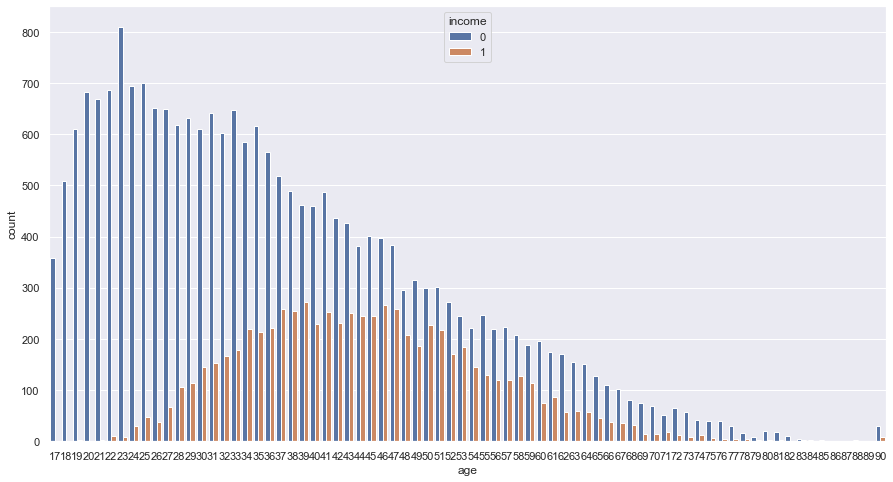

In [11]:
# age, income 시각화
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=train, x='age', hue = 'income')

<AxesSubplot:xlabel='age', ylabel='count'>

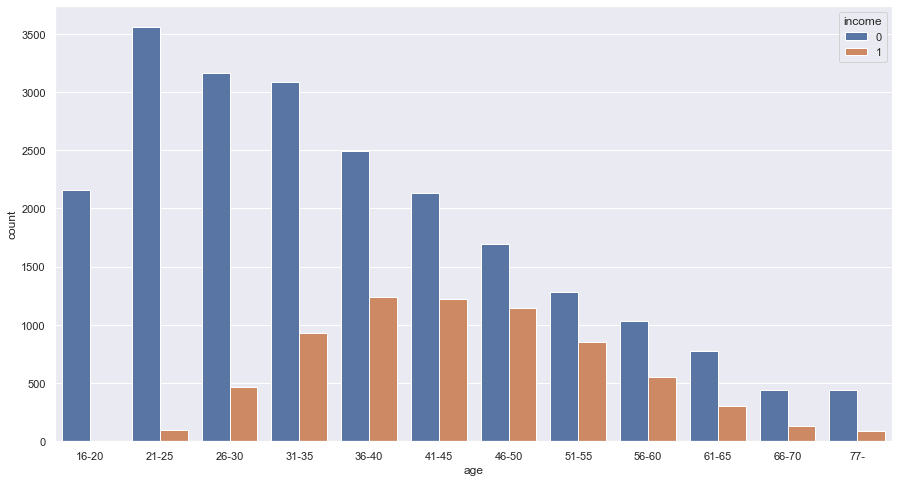

In [12]:
# age의 구간을 나눠보자
bins = [15,20,25,30,35,40,45,50,55,60,65,70,100]
labels = ['16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','77-']
train['age']=pd.cut(train['age'], bins= bins, labels = labels)
sns.countplot(data=train, x='age', hue='income')

In [13]:
bins = [15,20,25,30,35,40,45,50,55,60,65,70,100]
labels = ['16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','77-']
test['age']=pd.cut(test['age'], bins= bins, labels = labels)

In [14]:
train['age'].value_counts()

31-35    4020
36-40    3730
21-25    3657
26-30    3629
41-45    3354
46-50    2840
16-20    2162
51-55    2133
56-60    1592
61-65    1084
66-70     571
77-       533
Name: age, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

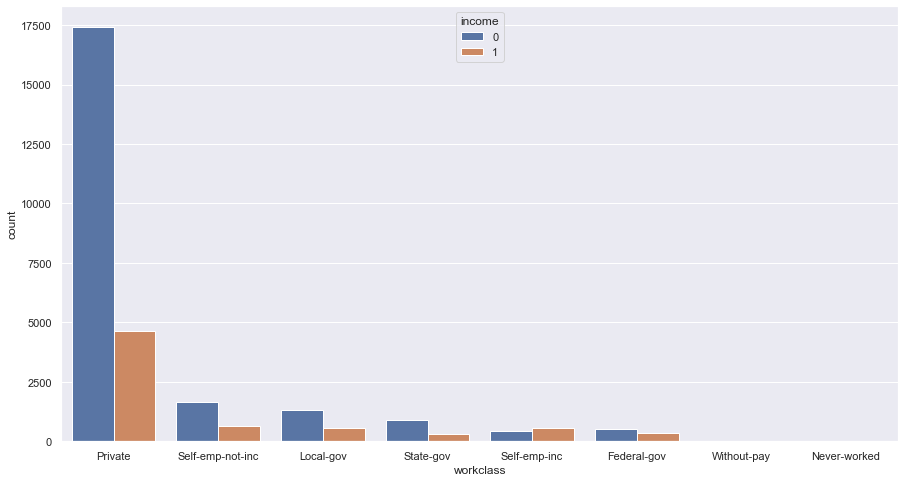

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=train, x='workclass', hue ='income')

<AxesSubplot:xlabel='native-country', ylabel='count'>

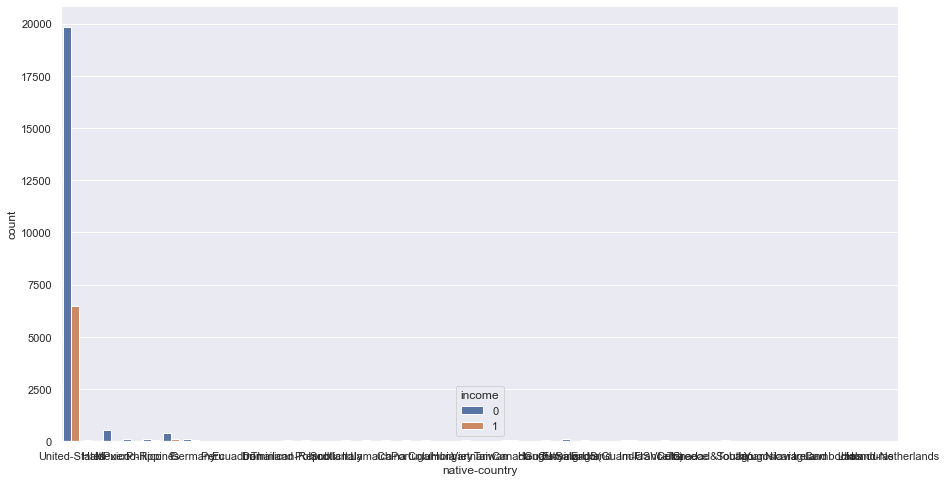

In [16]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=train, x='native-country', hue ='income')

In [17]:
# native-country 컬럼의 US 제외 나머지 컬럼을 Other로 변경
country = {"United-States":"United-States"}
country_mapping = train['native-country'].map(country)
country_mapping[country_mapping.isnull()]
train["native-country"] = country_mapping.fillna("Other")

In [18]:
train['native-country'].unique()

array(['United-States', 'Other'], dtype=object)

<AxesSubplot:xlabel='native-country', ylabel='count'>

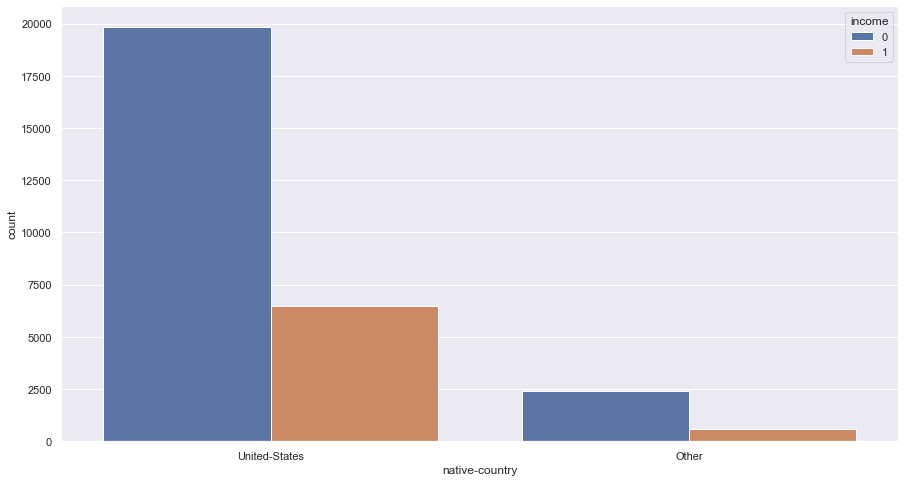

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=train, x='native-country', hue ='income')

In [20]:
train["native-country"].unique()

array(['United-States', 'Other'], dtype=object)

<AxesSubplot:xlabel='native-country', ylabel='count'>

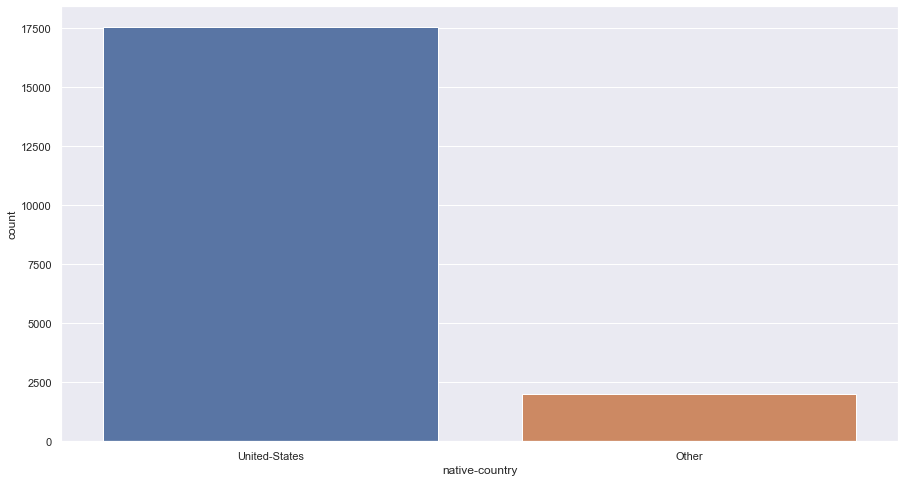

In [21]:
# test데이터도 변경
country = {"United-States":"United-States"}
country_mapping = test['native-country'].map(country)
country_mapping[country_mapping.isnull()]
test["native-country"] = country_mapping.fillna("Other")
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=test, x='native-country')

In [22]:
test["native-country"].unique()

array(['United-States', 'Other'], dtype=object)

<AxesSubplot:xlabel='occupation', ylabel='count'>

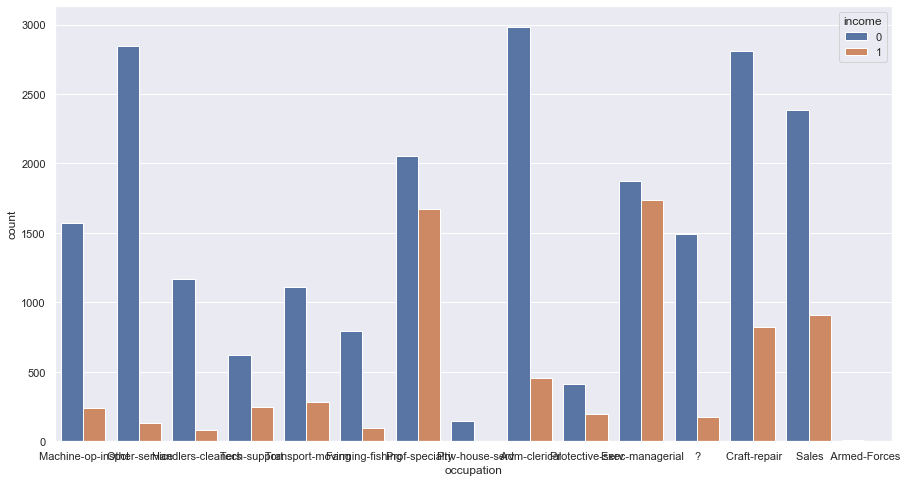

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=train, x='occupation', hue ='income')

<AxesSubplot:xlabel='education', ylabel='count'>

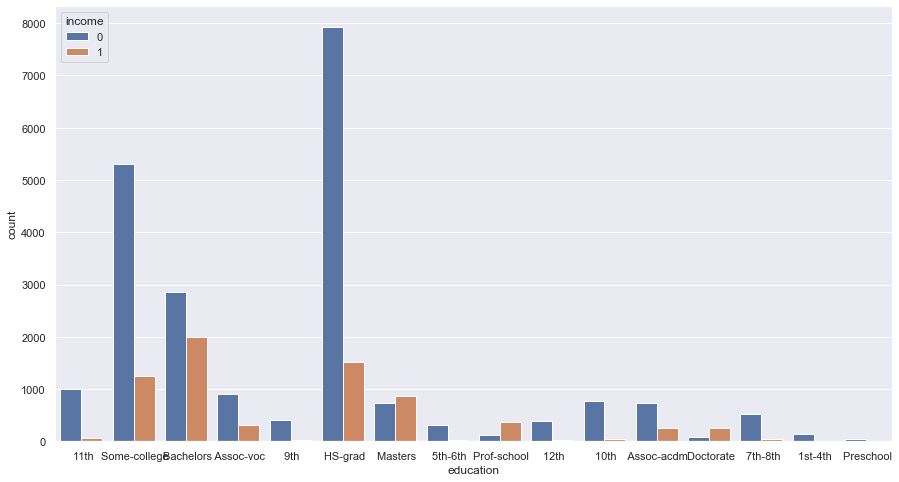

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=train, x='education', hue ='income')

<AxesSubplot:xlabel='education', ylabel='count'>

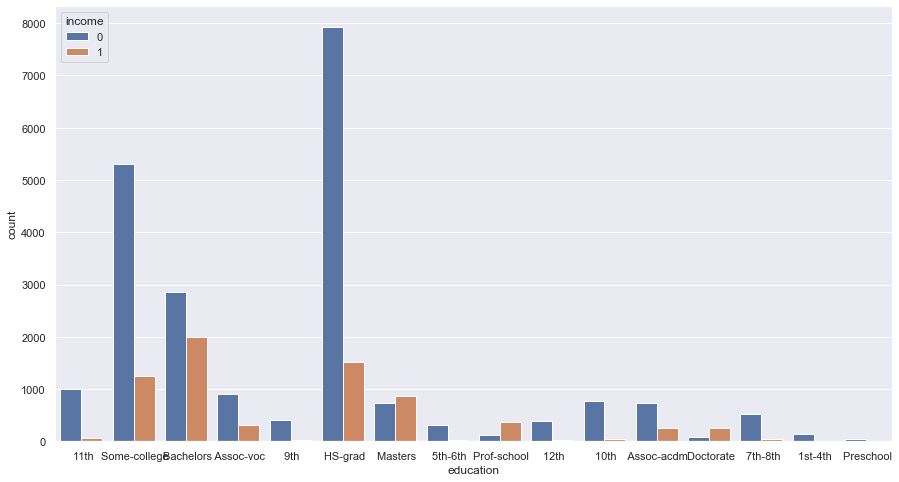

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=train, x='education', hue ='income')

<AxesSubplot:xlabel='education', ylabel='Count'>

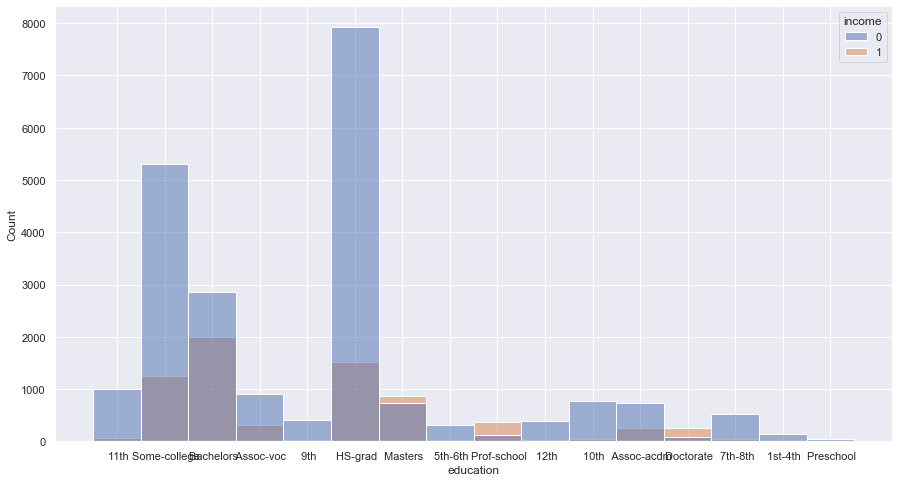

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=train, x='education', hue='income')

<AxesSubplot:xlabel='education-num', ylabel='Count'>

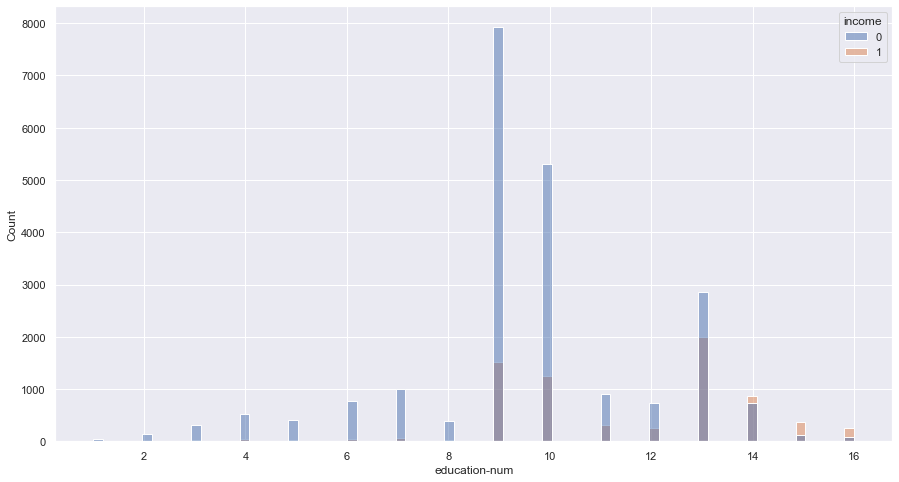

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=train, x='education-num', hue='income')

### 인코딩

In [28]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [29]:
train = train[["income", "age","education-num","workclass",'marital-status', 'occupation', 'relationship']]
# 인코딩할 컬럼명만 선택
categorical_features = ["age","workclass",'marital-status', 'occupation', 'relationship']

In [30]:
# 반복문으로 인코딩하기(train)
for feature_name in categorical_features:
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name)
    train = pd.concat([train, one_hot], axis=1) # 기존 데이터 끝에 one_hot을 붙임
    train.drop(feature_name, axis=1, inplace = True) # 기존 글자컬럼을 삭제

In [31]:
train

,income,education-num,age_16-20,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-50,age_51-55,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
no,,,,,,,,,,,,,,,,,,,,,
1,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,11,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,1,10,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,0,9,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
29302,0,9,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
29303,0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
test = test[["age","education-num","workclass",'marital-status', 'occupation', 'relationship']]
categorical_features = ["age","workclass", 'marital-status', 'occupation', 'relationship']
for feature_name in categorical_features:
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name)
    test = pd.concat([test, one_hot], axis=1) # 기존 데이터 끝에 one_hot을 붙임
    test.drop(feature_name, axis=1, inplace = True) # 기존 글자컬럼을 삭제

In [33]:
test

,education-num,age_16-20,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-50,age_51-55,age_56-60,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
no,,,,,,,,,,,,,,,,,,,,,
29306,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29307,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29308,13,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
29309,13,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29310,16,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48839,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
48840,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
X_train = train.iloc[:,1:]
y_train = train.income
X_test = test
X_train.shape, y_train.shape

((29305, 49), (29305,))

### 학습

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# 모델 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
# 모델 학습
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
# 모델 예측
knn_pre = knn_model.predict(X_test)
tree_pre = tree_model.predict(X_test)

### 하이퍼 파라미터 튜닝

In [36]:
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train,
                                                   y_train,
                                                   test_size=0.3,
                                                   random_state=99)

In [37]:
X_train2.shape, y_train2.shape

((20513, 49), (20513,))

In [38]:
X_val.shape, y_val.shape

((8792, 49), (8792,))

### KNN 튜닝

In [39]:
train_score = [] # 훈련데이터의 점수가 들어갈 리스트
val_score = [] # 검증데이터의 점수가 들어갈 리스트

for n in range(1,20): 
    # 이웃을 1~19개까지 변경하면서 모델생성
    knn_model = KNeighborsClassifier(n_neighbors=n)
    # 모델 학습
    knn_model.fit(X_train2, y_train2)
    # 훈련데이터에 대한 점수 누적
    train_score.append(knn_model.score(X_train2, y_train2))
    # 검증데이터에 대한 점수 누적
    val_score.append(knn_model.score(X_val, y_val))

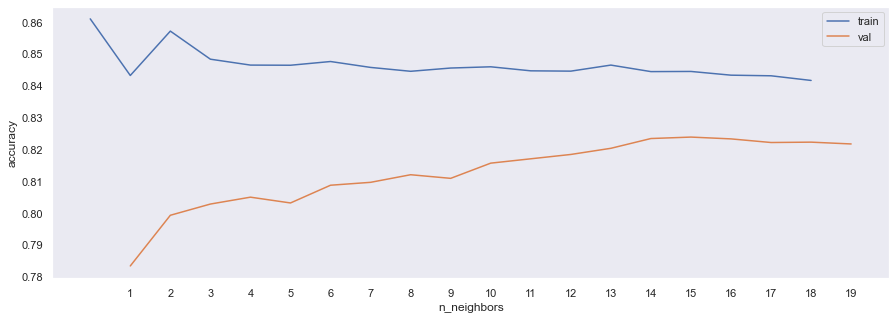

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(train_score, label="train")
plt.plot(range(1,20), val_score, label="val")
plt.xticks(range(1,20))
plt.grid()
plt.legend()
plt.ylabel("accuracy")
plt.xlabel('n_neighbors')
plt.show()

### DecisionTree 튜닝

In [41]:
# 교차검증함수
from sklearn.model_selection import cross_val_score
train_score = []
val_score = []

for d in range(1,30):
    tree_model = DecisionTreeClassifier(max_depth=d, random_state=99)
    result = cross_val_score(tree_model, X_train, y_train, cv=5)
    val_score.append(result.mean())

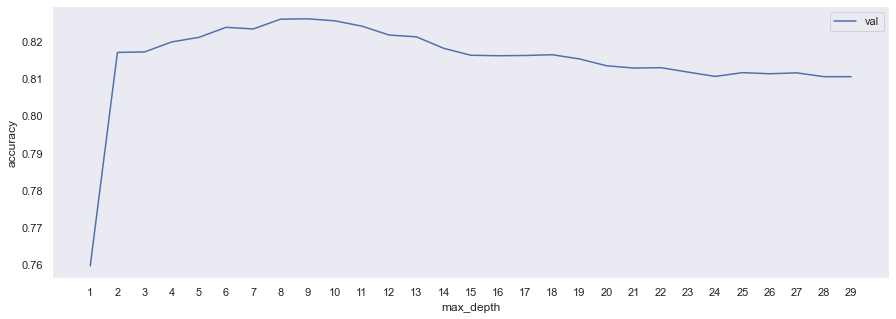

In [42]:
plt.figure(figsize=(15,5))
plt.plot(range(1,30), val_score, label="val")
plt.xticks(range(1,30))
plt.grid()
plt.legend()
plt.ylabel("accuracy")
plt.xlabel('max_depth')
plt.show()

### 모델 평가
- KNN : n_neighbors=11
- DecisionTree :  max_depth=7

In [43]:
final_knn = KNeighborsClassifier(n_neighbors=11)
final_tree = DecisionTreeClassifier(max_depth=7, random_state=720)

In [44]:
final_knn.fit(X_train, y_train)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=720)

In [45]:
knn_pre = final_knn.predict(X_test)
tree_pre = final_tree.predict(X_test)

In [46]:
# 정답파일 만들기
submission = pd.read_csv('classification220718/sample_submission.csv')
submission['income'] = knn_pre
# 데이터프레임을 csv파일로 저장
submission.to_csv("./classification220718/knn_pre.csv", index=False)

In [47]:
submission['income'] = tree_pre
submission.to_csv("./classification220718/tree_pre.csv", index=False)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, # 배깅할 모델 개수
                                 max_features=0.9, # 각 모델이 랜덤하게 사용할 특성 수
                                  max_depth=8, # 각 모델의 최대 깊이
                                  min_samples_leaf=10, # 리프노드의 최소샘플수
                                  random_state=99
                                 )
rf_rs = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_rs

array([0.83040437, 0.83842348, 0.8218734 , 0.82921003, 0.82818632])